In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

from calibration import read_calibration, undistort_image
from color_and_gradient import hls_select, pipeline

In [2]:
def imshow_arr(images):
    plt.figure()
    plt.rcParams["figure.figsize"] = (20,10)
    fig, axs = plt.subplots(1, len(images))
    for i in range(len(images)):
        if len(images[i].shape) == 2:
            axs[i].imshow(np.dstack((images[i], images[i], images[i]))*255)
        else:
            axs[i].imshow(images[i])
    

In [19]:
def pipeline2(img, s_thresh=(90, 255), sx_thresh=(20, 90)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
        
    # Stack each channel
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    ret = np.zeros_like(s_channel)
    ret[(s_binary == 1) | (sxbinary == 1)] = 1

    return ret

In [27]:
def l_filter(img, l_thresh=(20, 190)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= l_thresh[0]) & (scaled_sobel <= l_thresh[1])] = 1
    
    return sxbinary
    

<Figure size 1440x720 with 0 Axes>

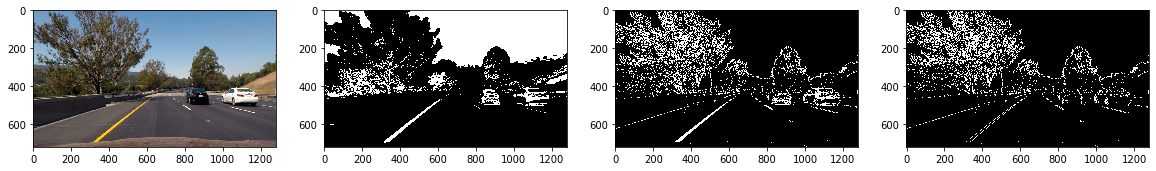

<Figure size 1440x720 with 0 Axes>

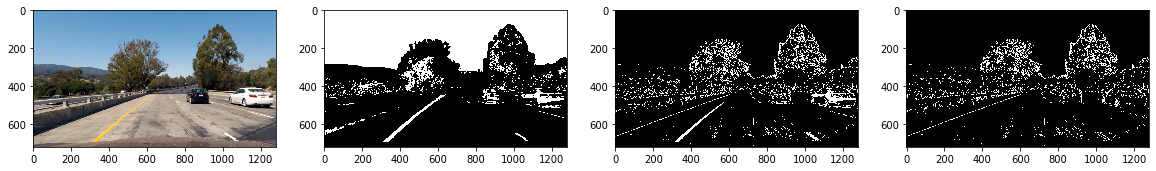

<Figure size 1440x720 with 0 Axes>

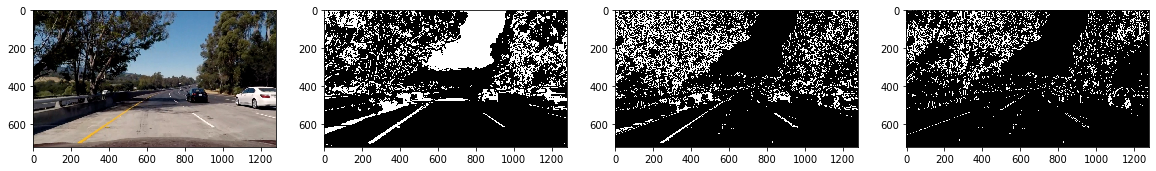

<Figure size 1440x720 with 0 Axes>

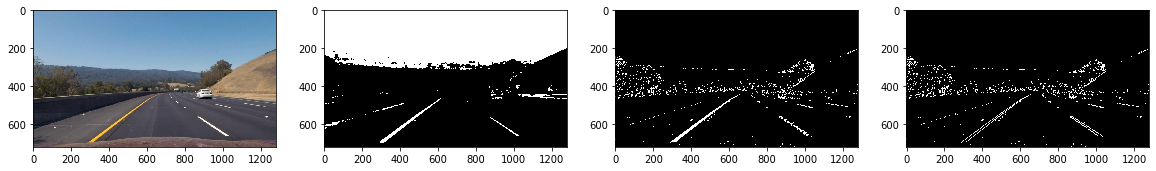

<Figure size 1440x720 with 0 Axes>

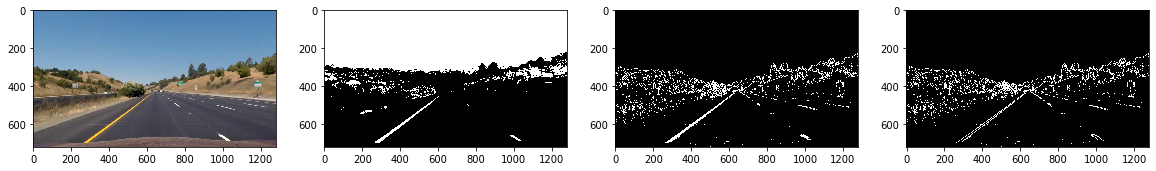

<Figure size 1440x720 with 0 Axes>

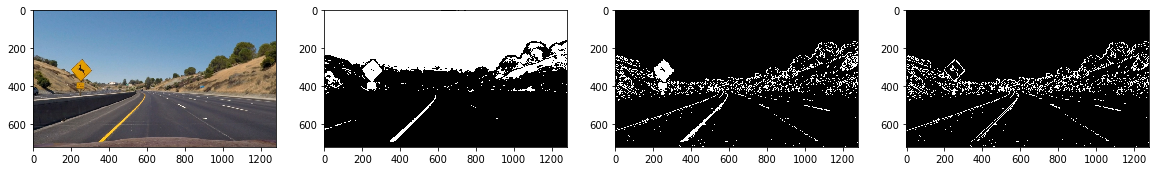

<Figure size 1440x720 with 0 Axes>

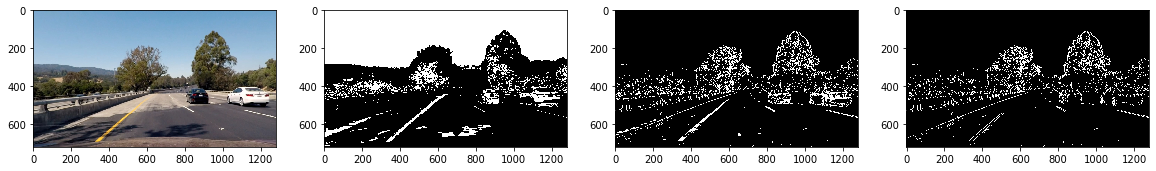

<Figure size 1440x720 with 0 Axes>

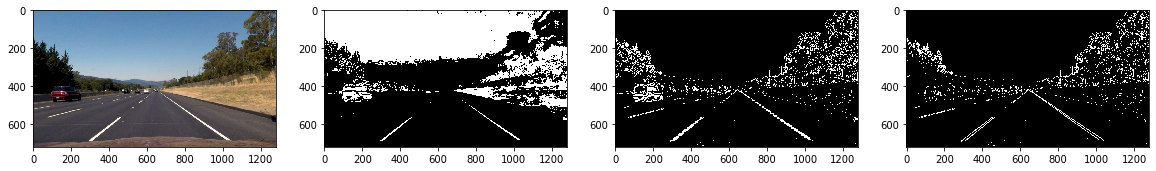

In [31]:
images = glob.glob("test_images/**.jpg")

m = read_calibration("intrinsics.yaml")
for image in images:
    img = mpimg.imread(image)
    img_rect = undistort_image(img, m)
    hls_binary = hls_select(img_rect, thresh=(90, 255))
    l_binary = l_filter(img_rect, l_thresh=(20, 150))
    edge = pipeline2(img_rect, s_thresh=(170, 255), sx_thresh=(20, 100))
    imshow_arr([img_rect, hls_binary, edge, l_binary])
    

